In [4]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv('/content/Food_Delivery_Times.csv')

# Display the first 5 rows of the DataFrame
display(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Display the DataFrame's information
display(df.info())

'| Order_ID   | Distance_km   | Weather   | Traffic_Level   | Time_of_Day   | Vehicle_Type   | Preparation_Time_min   | Courier_Experience_yrs   | Delivery_Time_min   |\n|:-----------|:--------------|:----------|:----------------|:--------------|:---------------|:-----------------------|:-------------------------|:--------------------|\n| 522        | 7.93          | Windy     | Low             | Afternoon     | Scooter        | 12                     | 1                        | 43                  |\n| 738        | 16.42         | Clear     | Medium          | Evening       | Bike           | 20                     | 2                        | 84                  |\n| 741        | 9.52          | Foggy     | Low             | Night         | Scooter        | 28                     | 1                        | 59                  |\n| 661        | 7.44          | Rainy     | Medium          | Afternoon     | Scooter        | 5                      | 1                        | 37      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


None

In [5]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Display descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
display(df.describe().to_markdown(numalign="left", stralign="left"))

# Display value counts for categorical columns
categorical_cols = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    display(df[col].value_counts().to_markdown(numalign="left", stralign="left"))

Missing values per column:
Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

Descriptive statistics for numerical columns:


'|       | Order_ID   | Distance_km   | Preparation_Time_min   | Courier_Experience_yrs   | Delivery_Time_min   |\n|:------|:-----------|:--------------|:-----------------------|:-------------------------|:--------------------|\n| count | 1000       | 1000          | 1000                   | 970                      | 1000                |\n| mean  | 500.5      | 10.06         | 16.982                 | 4.57938                  | 56.732              |\n| std   | 288.819    | 5.69666       | 7.20455                | 2.91439                  | 22.0709             |\n| min   | 1          | 0.59          | 5                      | 0                        | 8                   |\n| 25%   | 250.75     | 5.105         | 11                     | 2                        | 41                  |\n| 50%   | 500.5      | 10.19         | 17                     | 5                        | 55.5                |\n| 75%   | 750.25     | 15.0175       | 23                     | 7                      


Value counts for Weather:


'| Weather   | count   |\n|:----------|:--------|\n| Clear     | 470     |\n| Rainy     | 204     |\n| Foggy     | 103     |\n| Snowy     | 97      |\n| Windy     | 96      |'


Value counts for Traffic_Level:


'| Traffic_Level   | count   |\n|:----------------|:--------|\n| Medium          | 390     |\n| Low             | 383     |\n| High            | 197     |'


Value counts for Time_of_Day:


'| Time_of_Day   | count   |\n|:--------------|:--------|\n| Morning       | 308     |\n| Evening       | 293     |\n| Afternoon     | 284     |\n| Night         | 85      |'


Value counts for Vehicle_Type:


'| Vehicle_Type   | count   |\n|:---------------|:--------|\n| Bike           | 503     |\n| Scooter        | 302     |\n| Car            | 195     |'

In [6]:
# Impute missing numerical values with the mean
numerical_cols_with_missing = ['Courier_Experience_yrs']
for col in numerical_cols_with_missing:
    df[col].fillna(df[col].mean(), inplace=True)

# Impute missing categorical values with the mode
categorical_cols_with_missing = ['Weather', 'Traffic_Level', 'Time_of_Day']
for col in categorical_cols_with_missing:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify that missing values have been handled
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64


/tmp/ipython-input-476414304.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-476414304.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [7]:
# Encode categorical variables using one-hot encoding
categorical_cols = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the DataFrame to see the encoded columns
display(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Display the DataFrame's information to see the new columns and data types
display(df.info())

'| Order_ID   | Distance_km   | Preparation_Time_min   | Courier_Experience_yrs   | Delivery_Time_min   | Weather_Foggy   | Weather_Rainy   | Weather_Snowy   | Weather_Windy   | Traffic_Level_Low   | Traffic_Level_Medium   | Time_of_Day_Evening   | Time_of_Day_Morning   | Time_of_Day_Night   | Vehicle_Type_Car   | Vehicle_Type_Scooter   |\n|:-----------|:--------------|:-----------------------|:-------------------------|:--------------------|:----------------|:----------------|:----------------|:----------------|:--------------------|:-----------------------|:----------------------|:----------------------|:--------------------|:-------------------|:-----------------------|\n| 522        | 7.93          | 12                     | 1                        | 43                  | False           | False           | False           | True            | True                | False                  | False                 | False                 | False               | False              | Tr

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Preparation_Time_min    1000 non-null   int64  
 3   Courier_Experience_yrs  1000 non-null   float64
 4   Delivery_Time_min       1000 non-null   int64  
 5   Weather_Foggy           1000 non-null   bool   
 6   Weather_Rainy           1000 non-null   bool   
 7   Weather_Snowy           1000 non-null   bool   
 8   Weather_Windy           1000 non-null   bool   
 9   Traffic_Level_Low       1000 non-null   bool   
 10  Traffic_Level_Medium    1000 non-null   bool   
 11  Time_of_Day_Evening     1000 non-null   bool   
 12  Time_of_Day_Morning     1000 non-null   bool   
 13  Time_of_Day_Night       1000 non-null   bool   
 14  Vehicle_Type_Car        1000 non-null   b

None

In [9]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
numerical_cols = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows of the DataFrame to see the scaled columns
display(df.head().to_markdown(index=False, numalign="left", stralign="left"))

'| Order_ID   | Distance_km   | Preparation_Time_min   | Courier_Experience_yrs   | Delivery_Time_min   | Weather_Foggy   | Weather_Rainy   | Weather_Snowy   | Weather_Windy   | Traffic_Level_Low   | Traffic_Level_Medium   | Time_of_Day_Evening   | Time_of_Day_Morning   | Time_of_Day_Night   | Vehicle_Type_Car   | Vehicle_Type_Scooter   |\n|:-----------|:--------------|:-----------------------|:-------------------------|:--------------------|:----------------|:----------------|:----------------|:----------------|:--------------------|:-----------------------|:----------------------|:----------------------|:--------------------|:-------------------|:-----------------------|\n| 522        | -0.374085     | -0.691853              | -1.24766                 | 43                  | False           | False           | False           | True            | True                | False                  | False                 | False                 | False               | False              | Tr

In [23]:
# Create total estimated time feature
df['Total_Estimated_Time'] = df['Preparation_Time_min'] + df['Distance_km']

# Create peak hours feature
df['Peak_Hours'] = df['Time_of_Day_Evening'] | df['Time_of_Day_Night']

# Create interaction between weather and distance feature
df['Weather_Distance_Interaction'] = df['Distance_km'] * df['Weather_Bad']

# Display the first few rows of the DataFrame with new features
display(df.head().to_markdown(index=False, numalign="left", stralign="left"))

KeyError: 'Weather_Bad'

**Reasoning**:
The previous attempt failed because the column 'Weather_Bad' does not exist. I need to check the available columns after one-hot encoding and use the correct column name for bad weather.



In [15]:
# Check the available columns after one-hot encoding
print(df.columns)

Index(['Order_ID', 'Distance_km', 'Preparation_Time_min',
       'Courier_Experience_yrs', 'Delivery_Time_min', 'Weather_Foggy',
       'Weather_Rainy', 'Weather_Snowy', 'Weather_Windy', 'Traffic_Level_Low',
       'Traffic_Level_Medium', 'Time_of_Day_Evening', 'Time_of_Day_Morning',
       'Time_of_Day_Night', 'Vehicle_Type_Car', 'Vehicle_Type_Scooter',
       'Total_Estimated_Time', 'Peak_Hours', 'Bad_Weather',
       'Weather_Distance_Interaction'],
      dtype='object')


In [16]:
# Create total estimated time feature
df['Total_Estimated_Time'] = df['Preparation_Time_min'] + df['Distance_km']

# Create peak hours feature (Evening or Night)
df['Peak_Hours'] = df['Time_of_Day_Evening'] | df['Time_of_Day_Night']

# Create a combined 'Bad_Weather' column
df['Bad_Weather'] = df['Weather_Foggy'] | df['Weather_Rainy'] | df['Weather_Snowy'] | df['Weather_Windy']

# Create interaction between bad weather and distance feature
df['Weather_Distance_Interaction'] = df['Distance_km'] * df['Bad_Weather']

# Display the first few rows of the DataFrame with new features
display(df.head().to_markdown(index=False, numalign="left", stralign="left"))

'| Order_ID   | Distance_km   | Preparation_Time_min   | Courier_Experience_yrs   | Delivery_Time_min   | Weather_Foggy   | Weather_Rainy   | Weather_Snowy   | Weather_Windy   | Traffic_Level_Low   | Traffic_Level_Medium   | Time_of_Day_Evening   | Time_of_Day_Morning   | Time_of_Day_Night   | Vehicle_Type_Car   | Vehicle_Type_Scooter   | Total_Estimated_Time   | Peak_Hours   | Bad_Weather   | Weather_Distance_Interaction   |\n|:-----------|:--------------|:-----------------------|:-------------------------|:--------------------|:----------------|:----------------|:----------------|:----------------|:--------------------|:-----------------------|:----------------------|:----------------------|:--------------------|:-------------------|:-----------------------|:-----------------------|:-------------|:--------------|:-------------------------------|\n| 522        | -0.374085     | -0.691853              | -1.24766                 | 43                  | False           | False           

In [13]:
# Suitable regression algorithms from scikit-learn:

# 1. Linear Regression: Simple, interpretable, good baseline.
# 2. Ridge/Lasso Regression: Regularized linear models, good for preventing overfitting.
# 3. Decision Tree Regressor: Non-linear relationships, easy to understand.
# 4. Random Forest Regressor: Ensemble method, robust, handles non-linearities well.
# 5. Gradient Boosting Regressors (e.g., Gradient Boosting, XGBoost, LightGBM): Powerful ensemble methods, often provide high accuracy.
# 6. Support Vector Regressor (SVR): Can capture complex relationships, works well with high-dimensional data.

# Justification for Random Forest Regressor:
# Random Forest Regressor is a suitable choice for predicting delivery times due to several reasons:
# - It can capture non-linear relationships between features and the target variable (delivery time).
# - It is less prone to overfitting compared to individual decision trees.
# - It can handle both numerical and categorical features (after encoding).
# - It provides feature importance, which can be useful for understanding which factors most influence delivery time.
# - It is relatively robust to outliers.

# Alternative models:
# - Gradient Boosting Regressor (e.g., XGBoost): Often provides high accuracy and is a strong alternative to Random Forest.
# - Linear Regression: A good baseline model for interpretability and quick implementation.
# - Support Vector Regressor: Can be effective for complex relationships, but can be computationally more expensive.

print("Suitable regression algorithms:")
print("- Linear Regression")
print("- Ridge/Lasso Regression")
print("- Decision Tree Regressor")
print("- Random Forest Regressor")
print("- Gradient Boosting Regressors (e.g., Gradient Boosting, XGBoost, LightGBM)")
print("- Support Vector Regressor (SVR)")

print("\nJustification for Random Forest Regressor:")
print("Random Forest Regressor is a suitable choice because it can capture non-linear relationships, is less prone to overfitting, handles various feature types, provides feature importance, and is robust to outliers.")

print("\nAlternative models:")
print("- Gradient Boosting Regressor (e.g., XGBoost)")
print("- Linear Regression")
print("- Support Vector Regressor")

Suitable regression algorithms:
- Linear Regression
- Ridge/Lasso Regression
- Decision Tree Regressor
- Random Forest Regressor
- Gradient Boosting Regressors (e.g., Gradient Boosting, XGBoost, LightGBM)
- Support Vector Regressor (SVR)

Justification for Random Forest Regressor:
Random Forest Regressor is a suitable choice because it can capture non-linear relationships, is less prone to overfitting, handles various feature types, provides feature importance, and is robust to outliers.

Alternative models:
- Gradient Boosting Regressor (e.g., XGBoost)
- Linear Regression
- Support Vector Regressor


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Define features (X) and target variable (y)
X = df.drop('Delivery_Time_min', axis=1)
y = df['Delivery_Time_min']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

print("Data split into training and testing sets.")
print("Random Forest Regressor model trained successfully.")

Data split into training and testing sets.
Random Forest Regressor model trained successfully.


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 7.493399999999999
Mean Squared Error (MSE): 117.305655
R-squared (R2): 0.7382896132032215


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Hyperparameter tuning for Random Forest Regressor using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
print("Best Random Forest Regressor parameters:", grid_search.best_params_)

# Train a Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

print("Gradient Boosting Regressor model trained successfully.")

Best Random Forest Regressor parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Gradient Boosting Regressor model trained successfully.


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the tuned Random Forest model
y_pred_rf_tuned = best_rf_model.predict(X_test)
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print("Tuned Random Forest Regressor Performance:")
print(f"  Mean Absolute Error (MAE): {mae_rf_tuned}")
print(f"  Mean Squared Error (MSE): {mse_rf_tuned}")
print(f"  R-squared (R2): {r2_rf_tuned}")

# Evaluate the Gradient Boosting model
y_pred_gbr = gbr_model.predict(X_test)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("\nGradient Boosting Regressor Performance:")
print(f"  Mean Absolute Error (MAE): {mae_gbr}")
print(f"  Mean Squared Error (MSE): {mse_gbr}")
print(f"  R-squared (R2): {r2_gbr}")

# Compare performance
print("\nPerformance Comparison:")
print(f"Original Random Forest - MAE: {mae}, MSE: {mse}, R2: {r2}")
print(f"Tuned Random Forest - MAE: {mae_rf_tuned}, MSE: {mse_rf_tuned}, R2: {r2_rf_tuned}")
print(f"Gradient Boosting - MAE: {mae_gbr}, MSE: {mse_gbr}, R2: {r2_gbr}")

# Select the best model based on R2 score (higher is better)
best_model_name = ""
if r2_rf_tuned > r2_gbr and r2_rf_tuned > r2:
    best_model = best_rf_model
    best_model_name = "Tuned Random Forest"
elif r2_gbr > r2_rf_tuned and r2_gbr > r2:
    best_model = gbr_model
    best_model_name = "Gradient Boosting"
else:
    best_model = model # Original Random Forest
    best_model_name = "Original Random Forest"

print(f"\nSelected best model: {best_model_name}")

Tuned Random Forest Regressor Performance:
  Mean Absolute Error (MAE): 7.117104001906088
  Mean Squared Error (MSE): 106.4197281037978
  R-squared (R2): 0.7625762525698107

Gradient Boosting Regressor Performance:
  Mean Absolute Error (MAE): 6.654591674927388
  Mean Squared Error (MSE): 97.63190603793034
  R-squared (R2): 0.7821819937590094

Performance Comparison:
Original Random Forest - MAE: 7.493399999999999, MSE: 117.305655, R2: 0.7382896132032215
Tuned Random Forest - MAE: 7.117104001906088, MSE: 106.4197281037978, R2: 0.7625762525698107
Gradient Boosting - MAE: 6.654591674927388, MSE: 97.63190603793034, R2: 0.7821819937590094

Selected best model: Gradient Boosting


In [21]:
# Make predictions on the test set using the best model (Gradient Boosting Regressor)
y_pred_best_model = best_model.predict(X_test)

# Display the first few predictions
print("First 5 predictions from the best model:")
print(y_pred_best_model[:5])

First 5 predictions from the best model:
[35.06457409 65.21591614 46.79661044 42.79201491 76.60003453]


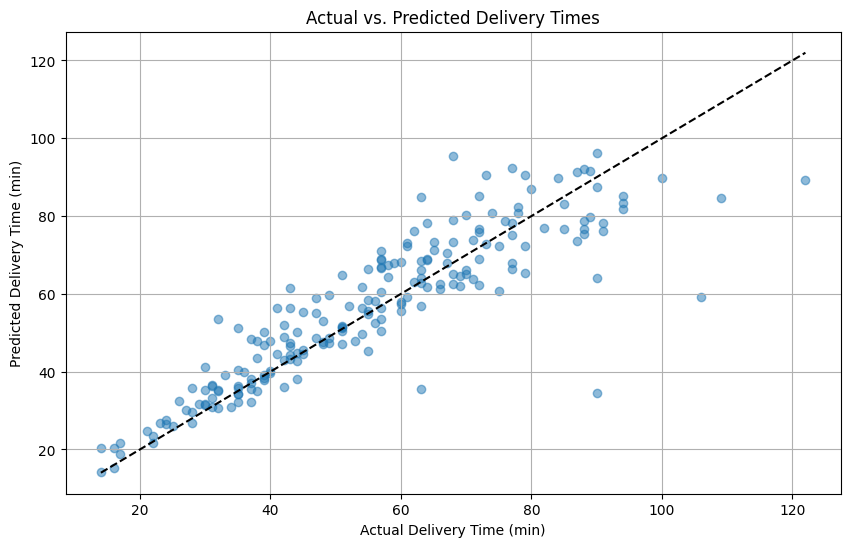

In [22]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted delivery times
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_model, alpha=0.5)

# Add labels and title
plt.xlabel("Actual Delivery Time (min)")
plt.ylabel("Predicted Delivery Time (min)")
plt.title("Actual vs. Predicted Delivery Times")

# Add a diagonal line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')

# Display the plot
plt.grid(True)
plt.show()